### 6. Text preprocessing

#### 6.1. Text preprocessing with nltk:


- Lowercasing: Convert all text to lowercase to maintain consistency.
- Tokenization: Split the text into individual words (tokens).
- Removing stop words.
- Lemmatization: reduce words to their base or root form to normalize variations.
- Removing special characters and numbers.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')
import seaborn as sns
import numpy as np
import re
import os

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [3]:
five = pd.read_csv("/Users/usuari/Desktop/Ironhack/BOOTCAMP/projects/final_project/data/five.csv")
five.head(3)

,title,summary,genre
0,A Clockwork Orange,"Alex, a teenager living in near-future Englan...",science fiction
1,The Plague,The text of The Plague is divided into five p...,literary fiction
2,All Quiet on the Western Front,"The book tells the story of Paul Bäumer, a Ge...",literary fiction


In [4]:
five.shape

(11013, 3)

In [5]:
leme = five.copy()
leme.head(2)

,title,summary,genre
0,A Clockwork Orange,"Alex, a teenager living in near-future Englan...",science fiction
1,The Plague,The text of The Plague is divided into five p...,literary fiction


In [6]:
# I create a function that returns me a new column with the preprocessed text. This is the step previous to train the model.

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Specify NLTK data directory
nltk_data_dir = "/path/to/your/nltk_data"  # Change this to the path where you want to store NLTK data

# Initialize NLTK resources outside the function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocessing_8(leme):
    # Handle missing values
    leme['cleaned_summary'] = ''

    # Process each row in the DataFrame
    cleaned_summaries = []

    for index, row in leme.iterrows():
        # Preprocess the text
        text = row['summary'].lower()
        tokens = word_tokenize(text)

        # Modify the condition to handle hyphenated words
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words and ('-' not in word or word.replace('-', '').isalpha())]

        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
        # Allow hyphens in cleaned tokens and split hyphenated words
        clean_tokens = [re.sub(r'[^a-zA-Z-]', ' ', word).split() for word in lemmatized_tokens]

        cleaned_summary = ' '.join(' '.join(words) for words in clean_tokens)
        cleaned_summaries.append(cleaned_summary)

    # Update the DataFrame column outside the loop
    leme['cleaned_summary'] = cleaned_summaries
    leme['cleaned_summary'] = leme['cleaned_summary'].astype(str)

    return leme


[nltk_data] Downloading package punkt to /Users/usuari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/usuari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/usuari/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
# I execute the function

preprocessing_8(leme)

,title,summary,genre,cleaned_summary
0,A Clockwork Orange,"Alex, a teenager living in near-future Englan...",science fiction,alex teenager living near-future england lea...
1,The Plague,The text of The Plague is divided into five p...,literary fiction,text plague divided five part town oran thou...
2,All Quiet on the Western Front,"The book tells the story of Paul Bäumer, a Ge...",literary fiction,book tell story paul b umer german soldier wh...
3,A Wizard of Earthsea,"Ged is a young boy on Gont, one of the larger...",fantasy,ged young boy gont one larger island north ar...
4,Blade Runner 3: Replicant Night,"Living on Mars, Deckard is acting as a consul...",science fiction,living mar deckard acting consultant movie cr...
...,...,...,...,...
11008,Hounded,"Atticus O’Sullivan, last of the Druids, lives ...",fantasy,atticus sullivan last druid life peacefully...
11009,Charlie and the Chocolate Factory,Charlie Bucket's wonderful adventure begins wh...,fantasy,charlie bucket s wonderful adventure begin fin...
11010,Red Rising,"""I live for the dream that my children will be...",fantasy,live dream child born free say like land...
11011,Frostbite,"Rose loves Dimitri, Dimitri might love Tasha, ...",fantasy,rose love dimitri dimitri might love tasha m...


In [8]:
# I replace the "-" with a space to separate two tokens.
hyphen = leme.copy()
hyphen['cleaned_summary'] = hyphen['cleaned_summary'].str.replace('-', ' ')
hyphen.head(4)

,title,summary,genre,cleaned_summary
0,A Clockwork Orange,"Alex, a teenager living in near-future Englan...",science fiction,alex teenager living near future england lea...
1,The Plague,The text of The Plague is divided into five p...,literary fiction,text plague divided five part town oran thou...
2,All Quiet on the Western Front,"The book tells the story of Paul Bäumer, a Ge...",literary fiction,book tell story paul b umer german soldier wh...
3,A Wizard of Earthsea,"Ged is a young boy on Gont, one of the larger...",fantasy,ged young boy gont one larger island north ar...


In [9]:
# I drop the tokens that only have one letter. 

from nltk.tokenize import word_tokenize
nltk.download('punkt')

hyphen['cleaned_summary'] = hyphen['cleaned_summary'].apply(lambda text: ' '.join(word for word in word_tokenize(text.lower()) if len(word) > 1))
hyphen.head(4)

[nltk_data] Downloading package punkt to /Users/usuari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,title,summary,genre,cleaned_summary
0,A Clockwork Orange,"Alex, a teenager living in near-future Englan...",science fiction,alex teenager living near future england lead ...
1,The Plague,The text of The Plague is divided into five p...,literary fiction,text plague divided five part town oran thousa...
2,All Quiet on the Western Front,"The book tells the story of Paul Bäumer, a Ge...",literary fiction,book tell story paul umer german soldier who u...
3,A Wizard of Earthsea,"Ged is a young boy on Gont, one of the larger...",fantasy,ged young boy gont one larger island north arc...


In [10]:
# I save my dataframe with the changes saved:

hyphen.to_csv("hyphen.csv", index=False)

# Specify the folder path and filename for the CSV file
folder_path = "/Users/usuari/Desktop/Ironhack/BOOTCAMP/projects/final_project/data"
file_name = "hyphen.csv"

# Combine the folder path and filename to create the full file path
full_file_path = f"{folder_path}/{file_name}"

# Export the DataFrame to the specified folder
hyphen.to_csv(full_file_path, index=False)

#### 6.2. Descriptive analysis of the dataset through NLP:

1) NER: name entity recognition with a simple spacy model (small).

2) NER: name entity recognition with a more complex spacy model (medium).

3) NER: name entity recognition with an even more complex spacy model (large). 

4) Create a new dataset that relates entities with genres, to do some queries later on with MySQLWorkbench. 

5) Create wordclouds with the top entities per genre, and also with the top words (tokens) per genre (useful also for Tableau).

6) Add a column with the len of each summary, so that then I can do a groupby and plot a histogram for each genre (useful for Tableau).

7) Add a column with the len of totals summaries for each genre. 

8) Add a column with the len of unique words of each summary, so that I can do a value_counts of which genre has more unique words 
(probably the fantasy genre), then a barplot for Tableau. 



##### 6.2.1. NER with a simply Spacy model in English language (small):

In [12]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 9.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.7.0
    Uninstalling en-core-web-sm-3.7.0:
      Successfully uninstalled en-core-web-sm-3.7.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [15]:
# I create a function that returns a new column with the name of entities for each summary. 

import spacy

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    # Process the text with spaCy
    doc = nlp(text)
    
    # Extract entities
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    
    return entities

def extract_entities_from_column(hyphen, column_name='cleaned_summary'):
    
    # Apply the extract_entities function to each row in the specified column
    hyphen['entities'] = hyphen[column_name].apply(extract_entities)

    return hyphen

In [17]:
extract_entities_from_column(hyphen, column_name='cleaned_summary')

,title,summary,genre,cleaned_summary,entities
0,A Clockwork Orange,"Alex, a teenager living in near-future Englan...",science fiction,alex teenager living near future england lead ...,"[(alex teenager, PERSON), (future england, FAC..."
1,The Plague,The text of The Plague is divided into five p...,literary fiction,text plague divided five part town oran thousa...,"[(five, CARDINAL), (three day, DATE), (quarant..."
2,All Quiet on the Western Front,"The book tells the story of Paul Bäumer, a Ge...",literary fiction,book tell story paul umer german soldier who u...,"[(paul, PERSON), (german, NORP), (german, NORP..."
3,A Wizard of Earthsea,"Ged is a young boy on Gont, one of the larger...",fantasy,ged young boy gont one larger island north arc...,"[(one, CARDINAL), (one day, DATE), (apprentice..."
4,Blade Runner 3: Replicant Night,"Living on Mars, Deckard is acting as a consul...",science fiction,living mar deckard acting consultant movie cre...,[]
...,...,...,...,...,...
11008,Hounded,"Atticus O’Sullivan, last of the Druids, lives ...",fantasy,atticus sullivan last druid life peacefully ar...,"[(atticus sullivan last druid, PERSON), (arizo..."
11009,Charlie and the Chocolate Factory,Charlie Bucket's wonderful adventure begins wh...,fantasy,charlie bucket wonderful adventure begin find ...,"[(charlie bucket, PERSON)]"
11010,Red Rising,"""I live for the dream that my children will be...",fantasy,live dream child born free say like land fathe...,"[(one, CARDINAL), (darrow, DATE)]"
11011,Frostbite,"Rose loves Dimitri, Dimitri might love Tasha, ...",fantasy,rose love dimitri dimitri might love tasha mas...,"[(dimitri dimitri, PERSON), (tasha mason, ORG)..."


##### 6.2.2. NER with a more complex Spacy model for English language (medium):

In [24]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 7.4 MB/s eta 0:00:00:00:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [25]:
# I create a function that returns a new column with the name of entities for each summary. 

# Load the spaCy English language model
nlp = spacy.load("en_core_web_md")

def extract_entities(text):
    # Process the text with spaCy
    doc = nlp(text)
    
    # Extract entities
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    
    return entities

def extract_entities_2(df, column_name='cleaned_summary'):
    # Apply the extract_entities function to each row in the specified column
    df['accurate_entities'] = df[column_name].apply(extract_entities)

    return df

In [26]:
extract_entities_2(hyphen)

,title,summary,genre,cleaned_summary,entities,accurate_entities
0,A Clockwork Orange,"Alex, a teenager living in near-future Englan...",science fiction,alex teenager living near future england lead ...,"[(alex teenager, PERSON), (future england, FAC...","[(alex teenager, PERSON), (future england lead..."
1,The Plague,The text of The Plague is divided into five p...,literary fiction,text plague divided five part town oran thousa...,"[(five, CARDINAL), (three day, DATE), (quarant...","[(five, CARDINAL), (dr bernard rieux life, PER..."
2,All Quiet on the Western Front,"The book tells the story of Paul Bäumer, a Ge...",literary fiction,book tell story paul umer german soldier who u...,"[(paul, PERSON), (german, NORP), (german, NORP...","[(paul umer, PERSON), (german, NORP), (german,..."
3,A Wizard of Earthsea,"Ged is a young boy on Gont, one of the larger...",fantasy,ged young boy gont one larger island north arc...,"[(one, CARDINAL), (one day, DATE), (apprentice...","[(one, CARDINAL), (one, CARDINAL), (one, CARDI..."
4,Blade Runner 3: Replicant Night,"Living on Mars, Deckard is acting as a consul...",science fiction,living mar deckard acting consultant movie cre...,[],"[(mar deckard, PERSON)]"
...,...,...,...,...,...,...
11008,Hounded,"Atticus O’Sullivan, last of the Druids, lives ...",fantasy,atticus sullivan last druid life peacefully ar...,"[(atticus sullivan last druid, PERSON), (arizo...","[(atticus sullivan, PERSON), (arizona, GPE), (..."
11009,Charlie and the Chocolate Factory,Charlie Bucket's wonderful adventure begins wh...,fantasy,charlie bucket wonderful adventure begin find ...,"[(charlie bucket, PERSON)]","[(charlie bucket, PERSON), (wonka, PERSON), (w..."
11010,Red Rising,"""I live for the dream that my children will be...",fantasy,live dream child born free say like land fathe...,"[(one, CARDINAL), (darrow, DATE)]","[(darrow, GPE), (one day, DATE), (darrow, PERS..."
11011,Frostbite,"Rose loves Dimitri, Dimitri might love Tasha, ...",fantasy,rose love dimitri dimitri might love tasha mas...,"[(dimitri dimitri, PERSON), (tasha mason, ORG)...","[(dimitri dimitri, PERSON), (tasha mason, PERS..."


##### 6.2.3. NER with an even more complex Spacy model for English language (large):

- The larger models tend to offer better accuracy but may require more computational resources.

In [28]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 615.1 kB/s eta 0:00:0000:0100:02
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [33]:
# I create a function that returns a new column with the name of entities for each summary. 

# Load the spaCy English language model
nlp = spacy.load("en_core_web_lg")

def extract_entities(text):
    # Process the text with spaCy
    doc = nlp(text)
    
    # Extract entities
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    
    return entities

def extract_entities_3(df, column_name='cleaned_summary'):
    # Apply the extract_entities function to each row in the specified column
    df['more_accurate_entities'] = df[column_name].apply(extract_entities)

    return df

In [34]:
extract_entities_3(hyphen)

,title,summary,genre,cleaned_summary,entities,accurate_entities,more_accurate_entities
0,A Clockwork Orange,"Alex, a teenager living in near-future Englan...",science fiction,alex teenager living near future england lead ...,"[(alex teenager, PERSON), (future england, FAC...","[(alex teenager, PERSON), (future england lead...","[(alex, PERSON), (england, GPE), (russian, NOR..."
1,The Plague,The text of The Plague is divided into five p...,literary fiction,text plague divided five part town oran thousa...,"[(five, CARDINAL), (three day, DATE), (quarant...","[(five, CARDINAL), (dr bernard rieux life, PER...","[(five, CARDINAL), (dr bernard rieux, PERSON),..."
2,All Quiet on the Western Front,"The book tells the story of Paul Bäumer, a Ge...",literary fiction,book tell story paul umer german soldier who u...,"[(paul, PERSON), (german, NORP), (german, NORP...","[(paul umer, PERSON), (german, NORP), (german,...","[(paul umer, PERSON), (german, NORP), (german,..."
3,A Wizard of Earthsea,"Ged is a young boy on Gont, one of the larger...",fantasy,ged young boy gont one larger island north arc...,"[(one, CARDINAL), (one day, DATE), (apprentice...","[(one, CARDINAL), (one, CARDINAL), (one, CARDI...","[(gont, PERSON), (one, CARDINAL), (archipelago..."
4,Blade Runner 3: Replicant Night,"Living on Mars, Deckard is acting as a consul...",science fiction,living mar deckard acting consultant movie cre...,[],"[(mar deckard, PERSON)]","[(mar deckard, PERSON)]"
...,...,...,...,...,...,...,...
11008,Hounded,"Atticus O’Sullivan, last of the Druids, lives ...",fantasy,atticus sullivan last druid life peacefully ar...,"[(atticus sullivan last druid, PERSON), (arizo...","[(atticus sullivan, PERSON), (arizona, GPE), (...","[(atticus sullivan, PERSON), (arizona, GPE), (..."
11009,Charlie and the Chocolate Factory,Charlie Bucket's wonderful adventure begins wh...,fantasy,charlie bucket wonderful adventure begin find ...,"[(charlie bucket, PERSON)]","[(charlie bucket, PERSON), (wonka, PERSON), (w...","[(charlie bucket, PERSON), (one, CARDINAL)]"
11010,Red Rising,"""I live for the dream that my children will be...",fantasy,live dream child born free say like land fathe...,"[(one, CARDINAL), (darrow, DATE)]","[(darrow, GPE), (one day, DATE), (darrow, PERS...","[(darrow, GPE), (one day, DATE), (darrow, GPE)..."
11011,Frostbite,"Rose loves Dimitri, Dimitri might love Tasha, ...",fantasy,rose love dimitri dimitri might love tasha mas...,"[(dimitri dimitri, PERSON), (tasha mason, ORG)...","[(dimitri dimitri, PERSON), (tasha mason, PERS...","[(tasha mason, PERSON), (winter, DATE), (st vl..."


In [35]:
# I'm going to keep only the column with the most accurate entities.

ner = hyphen.drop(columns=['entities', 'accurate_entities'])
ner.head(4)

,title,summary,genre,cleaned_summary,more_accurate_entities
0,A Clockwork Orange,"Alex, a teenager living in near-future Englan...",science fiction,alex teenager living near future england lead ...,"[(alex, PERSON), (england, GPE), (russian, NOR..."
1,The Plague,The text of The Plague is divided into five p...,literary fiction,text plague divided five part town oran thousa...,"[(five, CARDINAL), (dr bernard rieux, PERSON),..."
2,All Quiet on the Western Front,"The book tells the story of Paul Bäumer, a Ge...",literary fiction,book tell story paul umer german soldier who u...,"[(paul umer, PERSON), (german, NORP), (german,..."
3,A Wizard of Earthsea,"Ged is a young boy on Gont, one of the larger...",fantasy,ged young boy gont one larger island north arc...,"[(gont, PERSON), (one, CARDINAL), (archipelago..."


In [36]:
# I'm going to change the name of the third column.

ner = ner.rename(columns={'more_accurate_entities': 'entities'})
ner.head(3)

,title,summary,genre,cleaned_summary,entities
0,A Clockwork Orange,"Alex, a teenager living in near-future Englan...",science fiction,alex teenager living near future england lead ...,"[(alex, PERSON), (england, GPE), (russian, NOR..."
1,The Plague,The text of The Plague is divided into five p...,literary fiction,text plague divided five part town oran thousa...,"[(five, CARDINAL), (dr bernard rieux, PERSON),..."
2,All Quiet on the Western Front,"The book tells the story of Paul Bäumer, a Ge...",literary fiction,book tell story paul umer german soldier who u...,"[(paul umer, PERSON), (german, NORP), (german,..."


In [37]:
# I save my dataframe with the changes saved:

ner.to_csv("ner.csv", index=False)

# Specify the folder path and filename for the CSV file
folder_path = "/Users/usuari/Desktop/Ironhack/BOOTCAMP/projects/final_project/data"
file_name = "ner.csv"

# Combine the folder path and filename to create the full file path
full_file_path = f"{folder_path}/{file_name}"

# Export the DataFrame to the specified folder
ner.to_csv(full_file_path, index=False)

##### 6.2.4. Create a new dataset that relates entities with the book genres.

In [66]:
# I create a function to establish relationships between the entities and the book genres

from collections import Counter

# Entity Frequency by Genre
def entity_frequency_by_genre(ner):
    entity_counts_by_genre = ner.groupby('genre')['entities'].apply(lambda x: Counter(entity[1] for entities in x for entity in entities)).unstack(fill_value=0)
    return entity_counts_by_genre

In [44]:
print("Entity Frequency by Genre:")
entity_frequency_by_genre(ner) 

Entity Frequency by Genre:


,PERSON,CARDINAL,LOC,DATE,ORG,TIME,ORDINAL,GPE,FAC,PRODUCT,NORP,PERCENT,WORK_OF_ART,QUANTITY,LAW,MONEY,LANGUAGE,EVENT
genre,,,,,,,,,,,,,,,,,,
fantasy,27099,5504,332,2549,11569,711,1674,4326,404,596,2146,1,46,65,54,8,19,63
historical novel,16549,2361,383,1881,5228,368,891,4128,127,193,4061,1,38,52,31,18,25,104
literary fiction,32230,4865,519,4183,8457,970,2138,6845,272,351,4701,3,46,92,76,67,76,221
science fiction,23379,5346,708,2784,9726,480,1932,4611,276,534,3439,6,39,109,29,36,37,124
thriller,28649,4682,433,2914,8214,1061,1426,6058,252,273,3484,3,18,101,22,106,13,143


In [67]:
# I create another function to find the most common entities per genre (excluding cardinals and ordinals):

def top_entities_by_genre(ner, num_top_entities=5, exclude_entities=None):
    """
    Returns the top entities by genre based on their frequency.

    Parameters:
    - ner: DataFrame with columns 'genres' and 'entities'.
    - num_top_entities: Number of top entities to return for each genre.
    - exclude_entities: List of entity types to exclude from the results.

    Returns:
    - Pandas DataFrame with columns 'genres', 'entities', and 'frequency'.
    """
    if exclude_entities is None:
        exclude_entities = []

    # Exclude specified entities
    ner = ner[~ner['entities'].apply(lambda x: any(entity[1] in exclude_entities for entity in x))]

    # Explode entities
    exploded_df = ner.explode('entities')

    # Group by genre and entity, count occurrences, and get top entities for each genre
    top_entities_by_genre = (
        exploded_df.groupby(['genre', 'entities'])
        .size()
        .reset_index(name='frequency')
        .groupby('genre', group_keys=False)
        .apply(lambda x: x.nlargest(num_top_entities, 'frequency'))
    )

    return top_entities_by_genre

In [71]:
print("Top Entities by Genre:")
top = top_entities_by_genre(ner, num_top_entities=5, exclude_entities=['ORDINAL', 'CARDINAL'])
top

Top Entities by Genre:


,genre,entities,frequency
1694,fantasy,"(new york, GPE)",24
2333,fantasy,"(tom, PERSON)",23
629,fantasy,"(dresden, GPE)",21
1417,fantasy,"(london, GPE)",21
172,fantasy,"(artemis, GPE)",18
2795,historical novel,"(british, NORP)",52
3178,historical novel,"(french, NORP)",33
2638,historical novel,"(american, NORP)",29
3114,historical novel,"(english, NORP)",27
3348,historical novel,"(indian, NORP)",27


In [70]:
pip install wordcloud matplotlib

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/fb/c8/9790df08b2685bf931e940fdf1207b39f394dc28b033c603f04d7e8da0cf/wordcloud-1.9.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.8/159.8 kB 1.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_clouds_from_top_entities(top_entities_df):
    """
    Generates WordClouds for each genre based on the top entities DataFrame.

    Parameters:
    - top_entities_df: DataFrame with columns 'genre', 'entities', and 'frequency'.

    Returns:
    - None (displays WordClouds).
    """
    for genre in top_entities_df['genre'].unique():
        # Filter data for the specific genre
        genre_data = top_entities_df[top_entities_df['genre'] == genre]

        # Extract entities for the specific genre (excluding entity categories)
        genre_entities = ' '.join(str(entity[0]) for entity in genre_data['entities'].dropna())

        # Generate WordCloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_entities)

        # Display the WordCloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for {genre} based on Top Entities')
        plt.axis('off')
        plt.show()

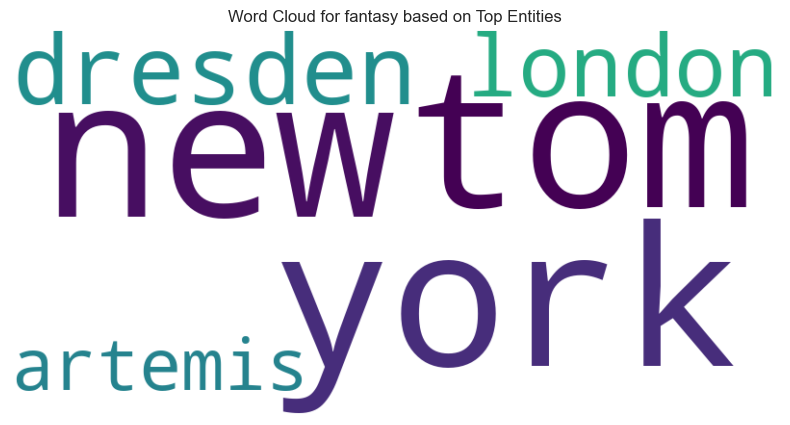

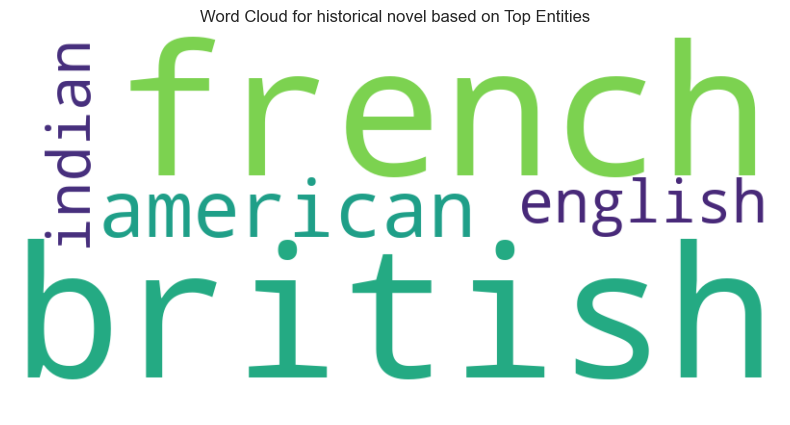

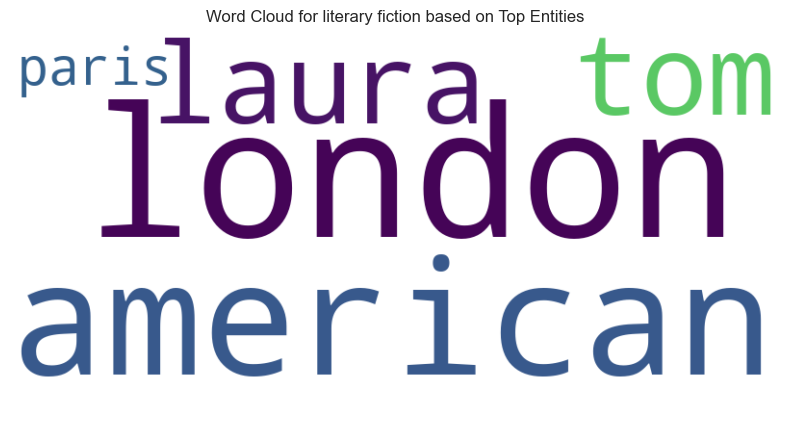

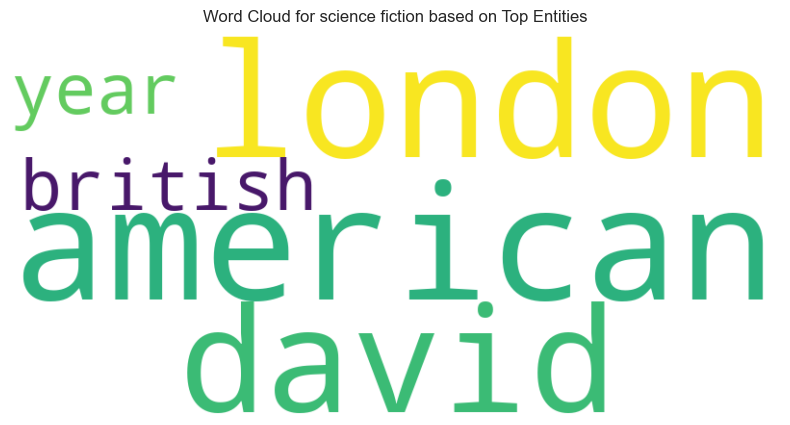

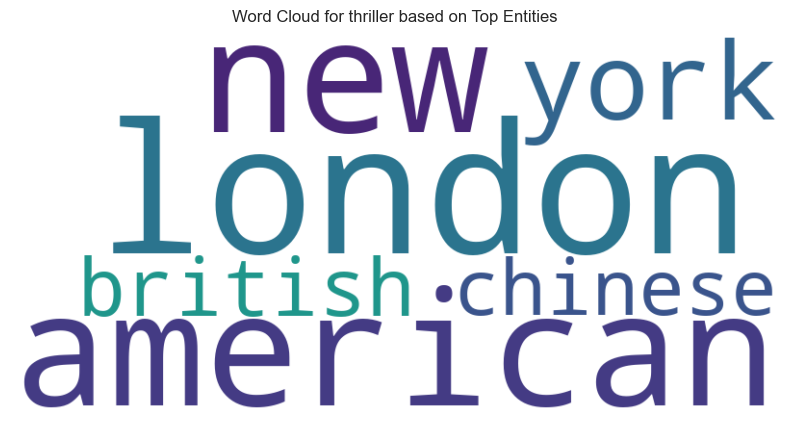

In [77]:
generate_word_clouds_from_top_entities(top)

In [91]:
# I want to create a function that returns wordclouds for each genre with their top 10 unique words.

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter

def generate_word_clouds_top_words_by_genre(df, num_top_words=10, custom_stopwords=None):
    """
    Generates WordClouds for each genre based on the top unique words in cleaned_summary.

    Parameters:
    - df: DataFrame with columns 'genre' and 'cleaned_summary'.
    - num_top_words: Number of top words to include for each genre.
    - custom_stopwords: List of additional stopwords to remove.

    Returns:
    - None (displays WordClouds).
    """
    for genre in df['genre'].unique():
        # Filter data for the specific genre
        genre_data = df[df['genre'] == genre]

        # Combine tokenized words in cleaned_summary
        all_words = ' '.join(genre_data['cleaned_summary'])

        # Count word frequencies
        word_counts = Counter(all_words.split())

        # Remove specified stopwords
        stop_words = set(STOPWORDS)
        if custom_stopwords:
            stop_words.update(custom_stopwords)
        filtered_words = {word: count for word, count in word_counts.items() if word not in stop_words}

        # Get the top 10 unique words
        top_words = [word for word, _ in Counter(filtered_words).most_common(num_top_words)]

        # Generate WordCloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_words))

        # Display the WordCloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for {genre} based on Top Words')
        plt.axis('off')
        plt.show()

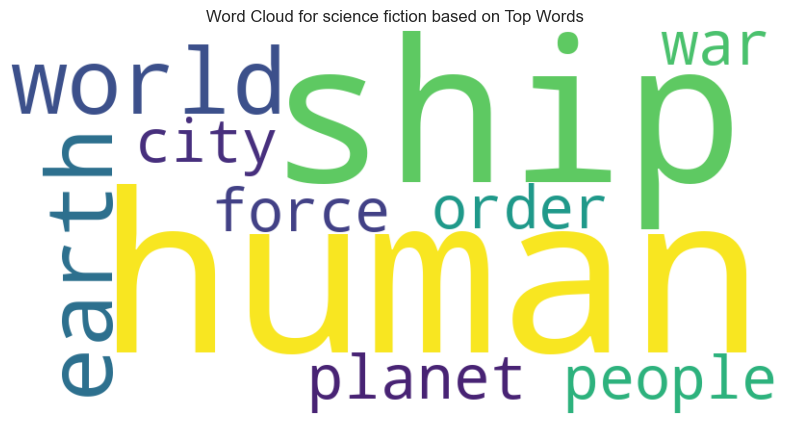

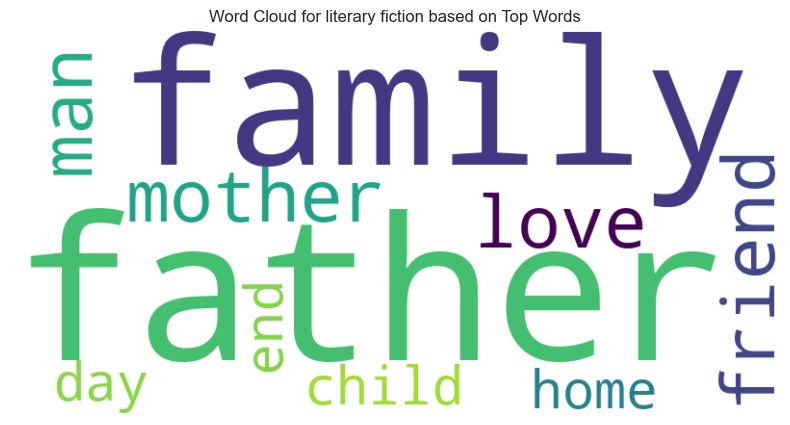

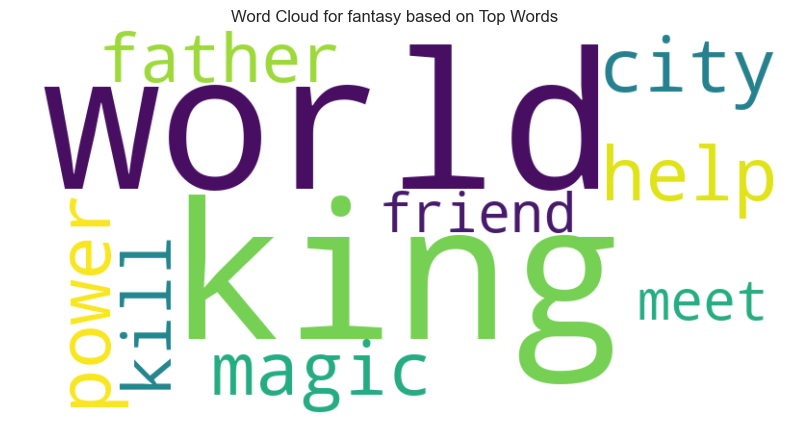

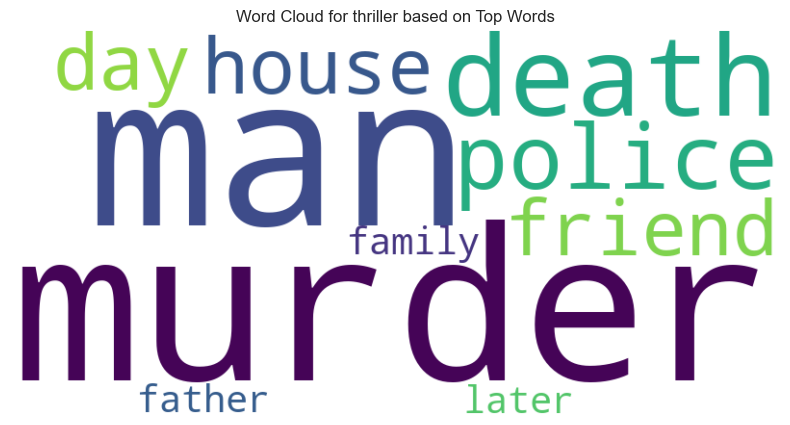

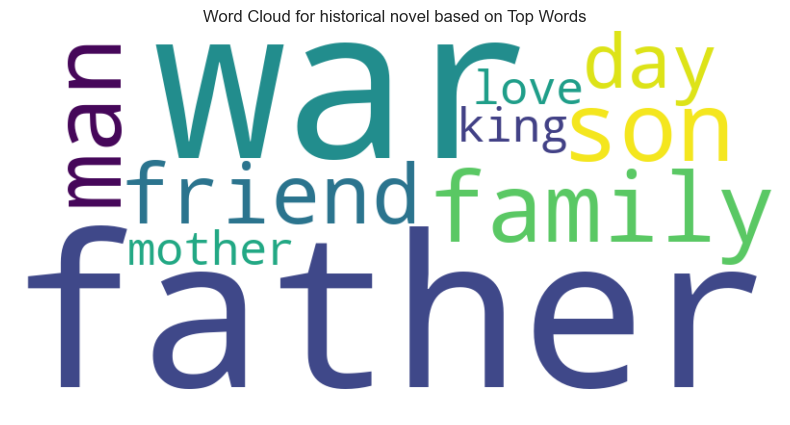

In [96]:
custom_stopwords = ['new', 'two', 'one', 'find', 'take', 'time', 'back', 'go', 'life', 'year', 'return', 'book', 'novel', 'tell', 'story', 'come', 'way', 'first', 'make', 'begin']
generate_word_clouds_top_words_by_genre(ner, num_top_words=10, custom_stopwords=custom_stopwords)


In [97]:
# According to these previous analysis we can see that the tokens may more useful to train the model than just the entities.

6) Add a column with the len of each summary, so that then I can do a groupby and plot a histogram for each genre (useful for Tableau).

7) Add a column with the len of totals summaries for each genre. 

8) Add a column with the len of unique words of each summary, so that I can do a value_counts of which genre has more unique words 
(probably the fantasy genre), then a barplot for Tableau. a

#### 6.3. MySQLWorkbench

- Upload the final dataset in MySQLWorkbench.
- Do some queries, like selecting to support the descriptive analysis of the dataset. 
    - the AVG tokens per genre
    - the AVG entities per genre
    - the total len words per genre or AVG
    - the total len of unique words per genre or AVG
    - the different type of categories and count per category for each genre.
    - count of each type of entity per genre (MySQLWorkbench)
    - count total entities per genre.